In [171]:
import os
print(os.listdir('C:\\Users\\Federico Nada\\Desktop\\DataFest/Notebooks'))

['.ipynb_checkpoints', 'Exploratory Analysis.ipynb', 'Standardize Values.ipynb', 'train.csv', 'train2.csv', 'Untitled.ipynb', 'Workout Strategies.ipynb']


In [170]:
import pandas as pd
import matplotlib.pyplot as plt

ratios = pd.read_csv('C:\\Users\\Federico Nada\\Desktop\\DataFest/Data for DataFest 2019/rpe.csv')

In [172]:
ratios['Date'] =  pd.to_datetime(ratios['Date'])
ratios.set_index('Date', inplace=True)
ratios.sort_values('Date', inplace = True)

In [174]:
import datetime as datetime
enddates = []
enddates.append('11/29/2017')
enddates.append('01/25/2018')
enddates.append('04/12/2018')
enddates.append('05/11/2018')
enddates.append('06/08/2018')
enddates.append('07/20/2018')
enddates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in enddates]

In [175]:
startdates = []
startdates.append('10/15/2017')
startdates.append('12/02/2017')
startdates.append('01/29/2018')
startdates.append('04/23/2018')
startdates.append('05/14/2018')
startdates.append('06/11/2018')
startdates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in startdates]

In [176]:
dubai =  ratios.loc[(ratios.index > startdates[0]) & (ratios.index < enddates[0])][['PlayerID' ,'AcuteChronicRatio']]
sydney =  ratios.loc[(ratios.index > startdates[1]) & (ratios.index < enddates[1])][['PlayerID' ,'AcuteChronicRatio']]
commonwealth =  ratios.loc[(ratios.index > startdates[2]) & (ratios.index < enddates[2])][['PlayerID' ,'AcuteChronicRatio']]
langford =  ratios.loc[(ratios.index > startdates[3]) & (ratios.index < enddates[3])][['PlayerID' ,'AcuteChronicRatio']]
paris =  ratios.loc[(ratios.index > startdates[4]) & (ratios.index < enddates[4])][['PlayerID' ,'AcuteChronicRatio']]
world =  ratios.loc[(ratios.index > startdates[5]) & (ratios.index < enddates[5])][['PlayerID' ,'AcuteChronicRatio']]

In [177]:
dubai_d = {}
for x in range(1, 18):
    dubai_d["dubai{0}".format(x)]= dubai[dubai['PlayerID'] == x].groupby(dubai[dubai['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
sydney_d = {}
for x in range(1, 18):
    sydney_d["sydney{0}".format(x)]= sydney[sydney['PlayerID'] == x].groupby(sydney[sydney['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
commonwealth_d = {}
for x in range(1, 18):
    commonwealth_d["commonwealth{0}".format(x)]= commonwealth[commonwealth['PlayerID'] == x].groupby(commonwealth[commonwealth['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
langford_d = {}
for x in range(1, 18):
    langford_d["langford{0}".format(x)]= langford[langford['PlayerID'] == x].groupby(langford[langford['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
paris_d = {}
for x in range(1, 18):
    paris_d["paris{0}".format(x)]= paris[paris['PlayerID'] == x].groupby(paris[paris['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
world_d = {}
for x in range(1, 18):
    world_d["world{0}".format(x)]= world[world['PlayerID'] == x].groupby(world[world['PlayerID'] == x].index).first()['AcuteChronicRatio'].values

In [209]:
data = {**dubai_d, **sydney_d, **commonwealth_d, **langford_d, **paris_d, **world_d}
data

{'dubai1': array([0.68, 0.62, 0.42, 0.07, 0.07,  nan, 0.01, 0.01, 0.01, 0.05, 0.05,
        0.05, 0.04, 0.12, 0.23, 0.21, 0.87, 1.19, 1.19, 2.  , 2.24, 1.82,
        2.02, 2.2 , 2.2 , 1.32, 1.21, 1.38, 0.9 , 0.92, 1.08, 1.08, 0.81,
        0.96, 1.17, 0.85, 1.  , 1.2 , 1.2 , 0.97, 1.17]),
 'dubai2': array([0.55, 0.42, 0.44, 0.49, 0.54, 0.67, 0.43, 0.44, 0.51, 0.56, 0.81,
        0.7 , 0.57, 0.64, 1.01, 0.44, 0.44, 1.02, 0.7 , 1.34, 1.88, 1.88,
        1.42, 1.68, 1.83, 1.66, 1.18, 1.48, 1.51, 1.18, 1.06, 1.15, 0.92,
        0.55, 0.66, 0.49, 0.43, 0.34]),
 'dubai3': array([0.92, 1.09, 1.02, 1.27, 1.13, 1.17, 0.94, 0.71, 0.79, 0.58, 0.66,
        0.66, 0.67, 0.59, 0.57, 0.68, 0.57, 0.8 , 0.91, 0.91, 0.77, 1.25,
        1.56, 1.59, 1.85, 2.4 , 2.4 , 1.92, 1.96, 1.68, 1.1 , 1.42, 1.42,
        1.09, 1.04, 1.06, 0.89, 0.47, 0.47, 0.53, 0.46, 0.49, 0.41]),
 'dubai4': array([0.55, 0.41, 0.48, 0.74, 1.11, 1.18, 1.02, 0.87, 0.53, 0.49, 0.59,
        0.98, 1.25, 1.2 , 1.15, 1.48, 1.11, 1.24, 1.

In [210]:
data_array = []
bins = 10

for i in range(1,18):
    data_array.append(pd.Series(data['dubai{}'.format(i)]).groupby(pd.cut(pd.Series(data['dubai{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['sydney{}'.format(i)]).groupby(pd.cut(pd.Series(data['sydney{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['commonwealth{}'.format(i)]).groupby(pd.cut(pd.Series(data['commonwealth{}'.format(i)]).index, bins)).max().interpolate().values)
#for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
#    data_array.append(pd.Series(data['langford{}'.format(i)]).groupby(pd.cut(pd.Series(data['langford{}'.format(i)]).index, bins)).max().interpolate().values)
#for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
#    data_array.append(pd.Series(data['paris{}'.format(i)]).groupby(pd.cut(pd.Series(data['paris{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,13,14,15,16,17):
    data_array.append(pd.Series(data['world{}'.format(i)]).groupby(pd.cut(pd.Series(data['world{}'.format(i)]).index, bins)).max().interpolate().values)

In [271]:
from sklearn.preprocessing import MinMaxScaler

ml2 = pd.DataFrame(data_array)
max = ml2.max(axis=1)
min = ml2.min(axis=1)
diff = max-min
for row in range(len(ml2)):
    for column in range(len(ml2.iloc[0])):
        ml2.iloc[row,column] = (ml2.iloc[row,column]-min[row]) / diff[row]


In [272]:
ml2.to_csv('train_final_reduced_normalized.csv')
ml2

,0,1,2,3,4,5,6,7,8,9
0,0.300448,0.000000,0.017937,0.385650,1.000000,0.982063,0.614350,0.479821,0.520179,0.533632
1,0.000000,0.090226,0.195489,0.345865,0.353383,1.000000,0.962406,0.721805,0.451128,0.082707
2,0.395722,0.342246,0.074866,0.080214,0.385027,1.000000,1.000000,0.475936,0.283422,0.000000
3,0.070000,0.700000,0.540000,0.110000,0.770000,1.000000,0.760000,0.720000,0.450000,0.000000
4,0.214815,0.592593,0.822222,0.103704,0.955556,0.955556,0.829630,1.000000,0.651852,0.000000
5,0.330275,0.596330,0.000000,0.449541,0.972477,0.981651,0.844037,1.000000,0.669725,0.036697
6,0.113402,0.474227,0.432990,0.082474,0.515464,1.000000,0.731959,0.762887,0.484536,0.000000
7,0.108108,0.702703,0.630631,0.234234,0.351351,0.792793,1.000000,0.738739,0.882883,0.000000
8,0.252174,0.486957,0.200000,0.260870,0.600000,0.843478,1.000000,0.886957,0.695652,0.000000
9,0.000000,0.137681,0.123188,0.202899,0.514493,1.000000,0.985507,0.579710,0.275362,0.108696


In [273]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(ml2.dropna().values)

    silhouette_avg = silhouette_score(ml2.dropna().values,cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

centers = kmeans.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.22490373174152528
For n_clusters = 3 The average silhouette_score is : 0.2233952579075904
For n_clusters = 4 The average silhouette_score is : 0.2014032161684707
For n_clusters = 5 The average silhouette_score is : 0.20031915580469084
For n_clusters = 6 The average silhouette_score is : 0.20697795295449084


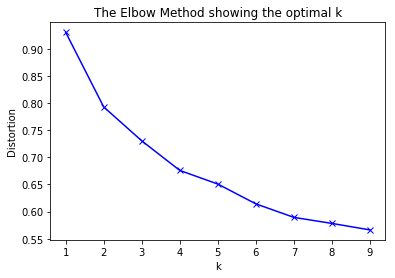

In [274]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ml2.dropna().values)
    kmeanModel.fit(ml2.dropna().values)
    distortions.append(sum(np.min(cdist(ml2.dropna().values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ml2.dropna().values.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

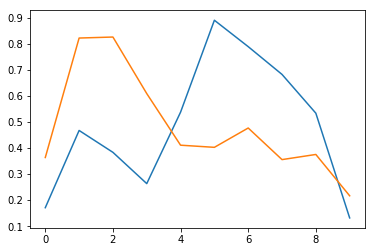

In [276]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(ml2.dropna().values)
centers = kmeans.cluster_centers_

for i in range(2):
    plt.plot(centers[i])

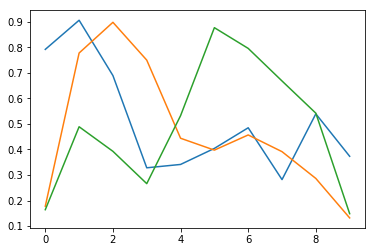

In [277]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit_predict(ml2.dropna().values)
centers3 = kmeans3.cluster_centers_
for i in range(3):
    plt.plot(centers3[i])

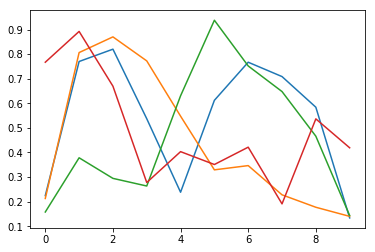

In [278]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit_predict(ml2.dropna().values)
centers4 = kmeans4.cluster_centers_
for i in range(4):
    plt.plot(centers4[i])

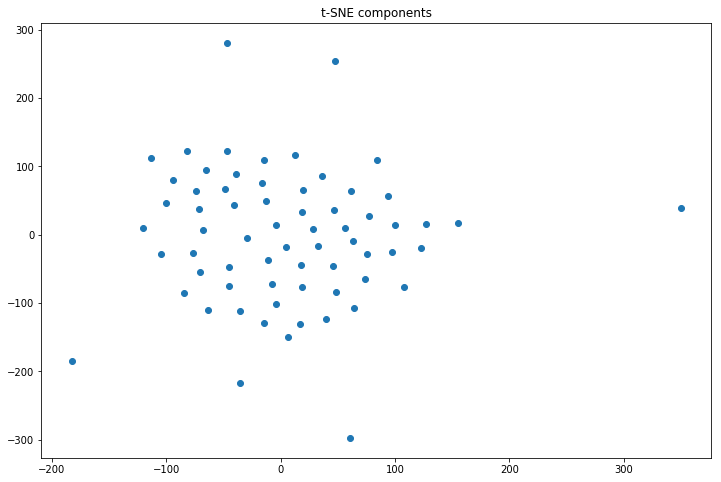

In [280]:
from sklearn.manifold import TSNE

X = TSNE(n_components = 2).fit_transform(ml2.dropna().values)

plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X[:,0], X[:,1])

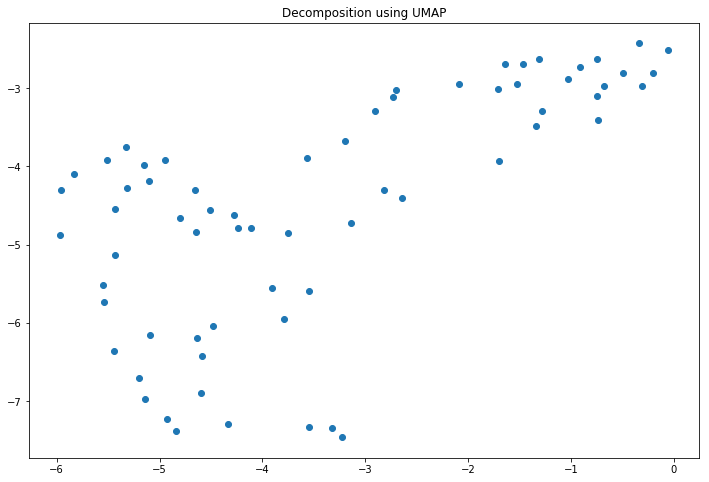

In [269]:
import umap

umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=5).fit_transform(ml2.dropna().values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])

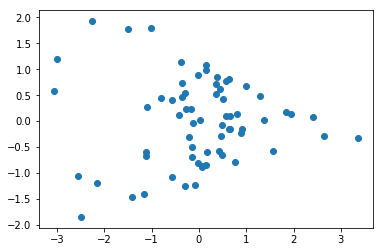

In [270]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(ml2.dropna().values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])